### Explore the crimes.csv dataset and use your findings to answer the following questions:
Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.\
Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.\
Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading and parsing the dataset
crimes = pd.read_csv("LA_crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [3]:
# Extract the first two digits from "TIME OCC", representing the hour,
# and converting it to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


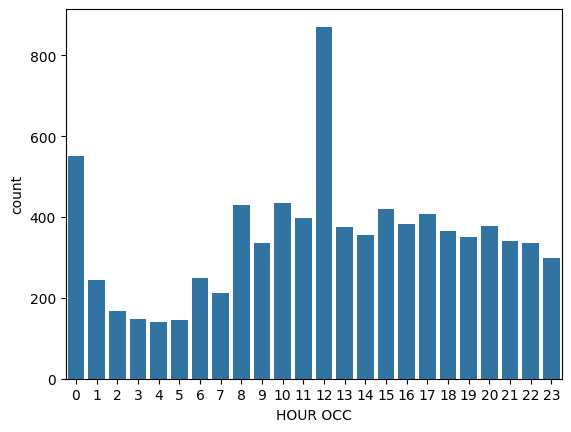

In [4]:
# countplot the data to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

In [5]:
# Peak crime hour
peak_crime_hour = 12
print(f"The peak crime hour is at: {peak_crime_hour}")

The peak crime hour is at: 12


In [6]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
# Save it as peak_night_crime_location
# Filter for the night-time hours
night_time = crimes[crimes['HOUR OCC'].isin([20,21,22,23,0,1,2,3])] 

In [8]:
# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False) ["HOUR OCC"].count()\
.sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]

In [9]:
# Print the peak night crime location
print(f"The peak night crime location is at: {peak_night_crime_location}")

The peak night crime location is at: 77th Street


In [10]:
# Filter for day-time hours
day_time = crimes[crimes['HOUR OCC'].isin([6,7,8,9,10,11,12,13,14,15,16,17,18])]

In [11]:
# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_day_crime_location = crimes.groupby('AREA NAME',as_index=False)['HOUR OCC'].count()\
.sort_values('HOUR OCC', ascending=False).iloc[0]["AREA NAME"]

In [12]:
print(f"The peak day crime location is at: {peak_day_crime_location}")

The peak day crime location is at: Central


In [13]:
crimes[['Vict Sex']].value_counts() 

Vict Sex
M           4133
F           4088
X            109
H              2
Name: count, dtype: int64

In [14]:
crimes[['Vict Age']].value_counts()

Vict Age
30          251
35          242
33          240
24          236
25          229
           ... 
91            2
95            2
98            2
93            1
96            1
Name: count, Length: 96, dtype: int64

In [15]:
# Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
# Save it as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [16]:
# Add a new column using pd.cut() to bin values into discrete intervals
crimes['Age Bracket'] = pd.cut(crimes['Vict Age'],
                               bins = age_bins,
                               labels = age_labels)

In [17]:
# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    1996
35-44    1810
45-54    1292
18-25    1272
55-64     998
65+       688
0-17      277
Name: count, dtype: int64


In [18]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


<Axes: xlabel='Vict Sex', ylabel='count'>

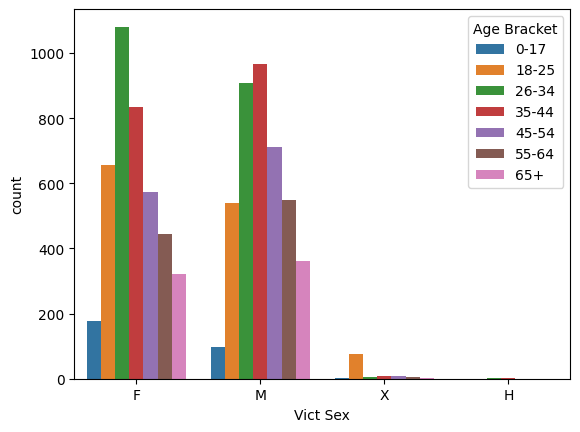

In [19]:
sns.countplot(data=crimes, x='Vict Sex', hue='Age Bracket')

<Axes: xlabel='HOUR OCC', ylabel='count'>

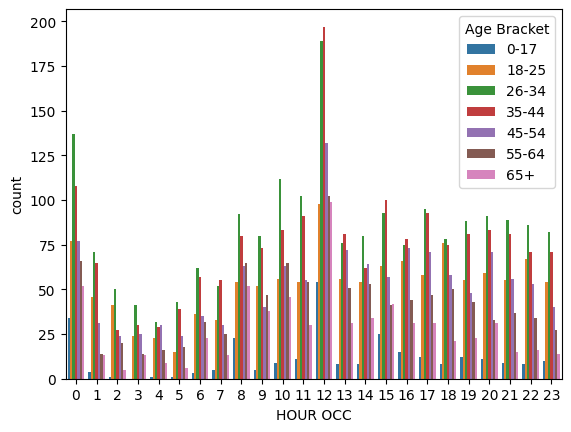

In [20]:
sns.countplot(data=crimes, x='HOUR OCC', hue='Age Bracket')

<Axes: xlabel='Vict Sex', ylabel='count'>

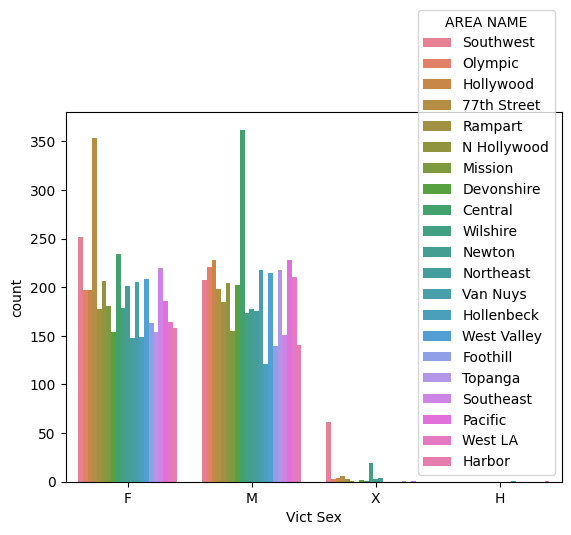

In [21]:
sns.countplot(data=crimes, x='Vict Sex', hue='AREA NAME')

<Axes: xlabel='Age Bracket', ylabel='count'>

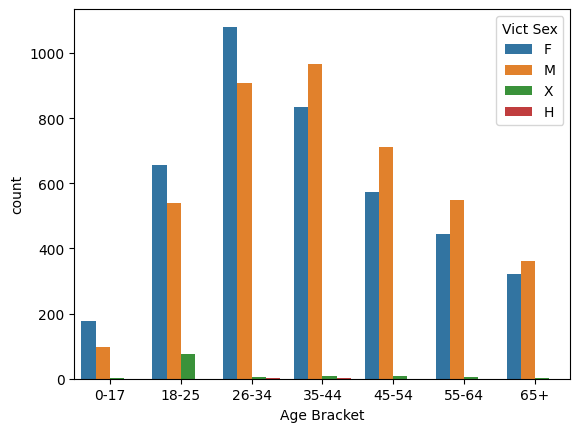

In [22]:
sns.countplot(data=crimes, x='Age Bracket', hue='Vict Sex')

<Axes: xlabel='HOUR OCC', ylabel='count'>

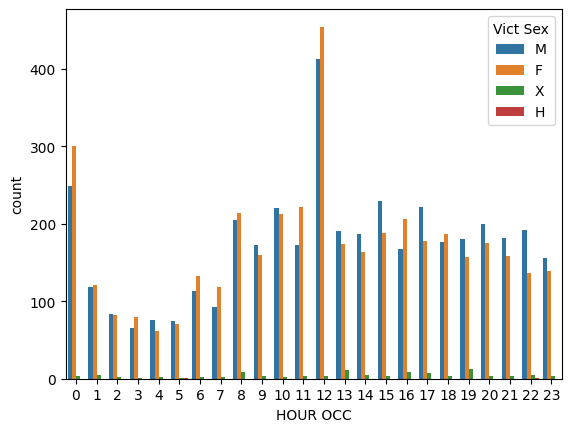

In [23]:
sns.countplot(data=crimes, x='HOUR OCC', hue='Vict Sex')

<Axes: xlabel='count', ylabel='AREA NAME'>

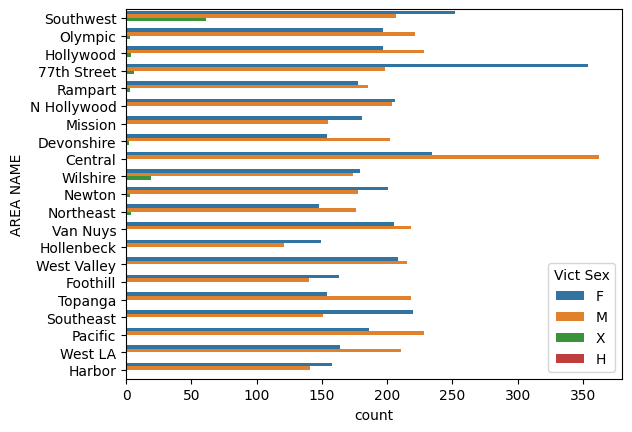

In [24]:
sns.countplot(data=crimes, y='AREA NAME', hue='Vict Sex')

<Axes: xlabel='count', ylabel='AREA NAME'>

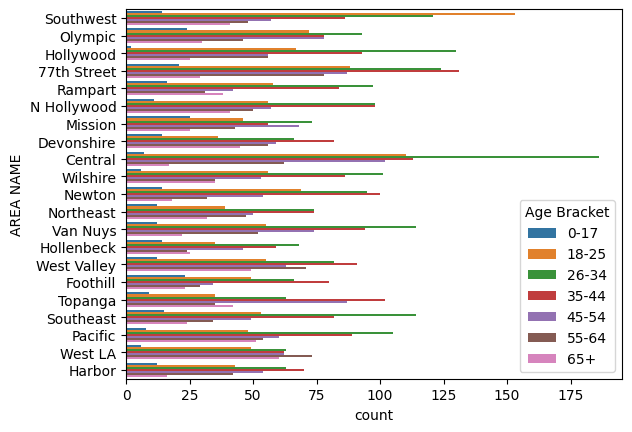

In [25]:
sns.countplot(data=crimes, y='AREA NAME', hue='Age Bracket')

<Axes: xlabel='count', ylabel='AREA NAME'>

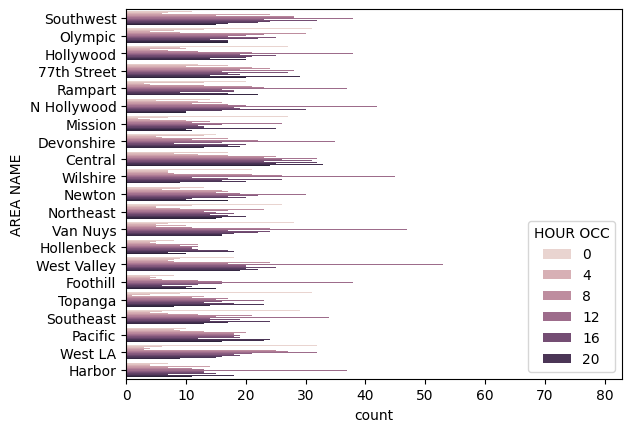

In [26]:
sns.countplot(data=crimes, y='AREA NAME', hue='HOUR OCC')

In [27]:
crimes[['AREA NAME','HOUR OCC']].value_counts()

AREA NAME    HOUR OCC
77th Street  12          79
Topanga      12          57
West Valley  12          53
77th Street  0           52
Pacific      12          50
                         ..
Rampart      3            3
West LA      7            3
Mission      3            2
Hollenbeck   5            1
Topanga      5            1
Name: count, Length: 504, dtype: int64

In [28]:
crimes[['HOUR OCC']].value_counts()

HOUR OCC
12          871
0           551
10          434
8           429
15          421
17          407
11          397
16          382
20          379
13          375
18          366
14          355
19          350
21          342
22          335
9           335
23          298
6           248
1           244
7           213
2           168
3           147
5           146
4           140
Name: count, dtype: int64

In [29]:
crimes_1 = crimes[crimes['AREA NAME'] == 'Central'].sort_values(by='AREA NAME',ascending=True)

In [30]:
crimes_1.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
11,220119956,2022-09-06,2020-07-01,1130,Central,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,800 S HOPE ST,11,18-25
5555,220116734,2022-07-24,2022-07-19,2315,Central,BATTERY - SIMPLE ASSAULT,41,M,A,"""STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)""",Invest Cont,9TH,23,35-44
5567,220126372,2022-12-14,2022-12-14,1305,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,55,M,H,VERBAL THREAT,Invest Cont,700 YALE ST,13,55-64
5584,220114749,2022-06-22,2022-06-22,0955,Central,"""ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT""",24,F,H,BOW AND ARROW,Adult Other,100 LEROY ST,9,18-25
5606,220114244,2022-06-13,2022-06-04,1000,Central,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),69,F,W,NaN,Invest Cont,900 E 1ST ST,10,65+


In [35]:
crimes_1['HOUR OCC'].value_counts().sort_values(ascending=True)

HOUR OCC
3      8
4     12
2     13
7     16
5     16
6     17
1     17
16    23
9     23
23    24
8     25
0     25
20    25
13    26
22    28
17    30
15    31
10    32
11    32
18    32
19    33
21    33
14    34
12    42
Name: count, dtype: int64

In [38]:
# Midday has the largest volume of crime in the Central Area with 42 crimes commited
peak_crime_hour = 12

In [32]:
crimes_2 = crimes[crimes['AREA NAME'] == '77th Street'].sort_values(by='AREA NAME', ascending=True)

In [34]:
crimes_2.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
5446,221216722,2022-07-30,2022-07-30,0930,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,49,M,B,"""STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)""",Adult Other,1200 W 62ND ST,9,45-54
5442,221218518,2022-08-28,2022-08-28,1000,77th Street,BRANDISH WEAPON,39,M,B,OTHER KNIFE,Adult Arrest,6600 5TH AV,10,35-44
5418,221221844,2022-10-17,2022-02-01,0001,77th Street,OTHER MISCELLANEOUS CRIME,54,M,H,NaN,Adult Other,1500 W 55TH ST,0,45-54
5411,221217212,2022-08-08,2022-08-08,1810,77th Street,INDECENT EXPOSURE,23,F,W,"""STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)""",Invest Cont,6900 S WESTERN AV,18,18-25


In [36]:
crimes_2['HOUR OCC'].value_counts().sort_values(ascending=True)

HOUR OCC
4     10
1     12
2     12
20    14
5     14
13    16
10    17
14    17
3     17
16    17
7     19
9     19
18    19
23    20
6     21
22    22
19    24
8     24
15    27
11    28
21    29
17    29
0     52
12    79
Name: count, dtype: int64

In [39]:
# Midday has the largest volume of crime in the 77th Street Area with 79 crimes commited
peak_crime_hour = 12